# Projeto: Séries temporais - MBA

Observações:

1. Para cada questão, crie novas células para efetuar seus códigos. 

2. Nomear variáveis de acordo com o contexto da questão. 

3. Caso necessário, utilize novas caixas de textos para deixar comentários. 

Prof. Jorge Luiz 

jorgearaujo@unifor.br

Você recebeu o dado 'chuva.csv'. Atribua-o a um dataframe df. 

1. Apresente graficamente o comportamento da chuva como função do tempo. 

2. Faça a decomposição da série em 3 parte: 'Tendência', 'Sazonalidade' e 'Resíduo'. Para cada componente, faça os seguintes itens:

    a. Apresente, graficamente, o comportamento da 'Tendência', 'Sazonalidade' e 'Resíduo' como função do tempo. 

    b. Teste a estacionaridade para cada componente.
    
    c. Teste a normalidade para cada componente.
    
3. Faça a transformação cúbica e logaritmica em df. Para cada transformação, faça uma diferenciação. Em quais operações é possível obter uma evolução estacionária e/ou normal?

# Dica de Solução 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 

In [2]:
df=pd.read_csv('chuva.csv')

In [3]:
df

,Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
0,1985,184.90,242.9,230.00,59.0,126.2,14.60,4.0,21.80,126.1,71.10,111.30,155.20
1,1986,199.60,221.0,218.70,106.5,113.1,3.90,30.3,27.85,34.5,60.70,242.50,389.90
2,1987,525.80,249.3,161.30,98.1,293.8,183.90,11.8,30.90,80.2,84.80,72.70,152.10
3,1988,268.70,224.4,189.20,175.1,224.9,58.60,1.3,0.20,28.4,173.90,100.20,289.80
4,1989,312.90,344.3,288.20,66.3,21.7,52.50,150.1,32.90,52.1,80.10,88.00,236.70
5,1990,284.10,196.9,310.10,85.8,77.9,50.60,121.2,76.30,97.2,206.80,116.30,149.80
6,1991,330.70,340.3,522.40,200.3,43.3,96.80,28.2,37.30,101.4,168.00,67.30,237.90
7,1992,129.20,258.5,227.97,87.2,93.5,11.60,40.9,24.70,150.6,219.60,145.04,211.70
8,1993,221.50,225.7,110.00,84.6,133.9,74.70,11.2,40.80,210.1,134.10,125.50,170.50
9,1994,196.90,184.4,231.60,111.4,54.9,30.50,39.2,2.40,1.8,147.60,86.60,276.30


<Axes: ylabel='Ano'>

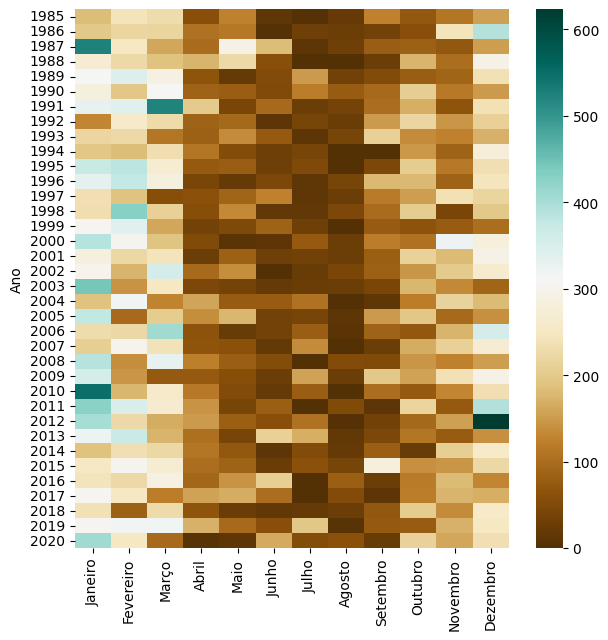

In [4]:
plt.figure(figsize=(7,7))
sns.heatmap(df.set_index('Ano'),cmap='BrBG')

In [5]:
#TRANSOFORMANDO O DADO

df.drop('Ano',axis=1,inplace=True)

In [6]:
ser=pd.Series(df.values.flatten(),index=pd.date_range('1/1/1985',periods=432,freq='ME'))

In [7]:
ser

1985-01-31    184.90
1985-02-28    242.90
1985-03-31    230.00
1985-04-30     59.00
1985-05-31    126.20
               ...  
2020-08-31     62.10
2020-09-30     22.90
2020-10-31    213.90
2020-11-30    162.10
2020-12-31    236.04
Freq: ME, Length: 432, dtype: float64

1. Apresente graficamente o comportamento da chuva como função do tempo.

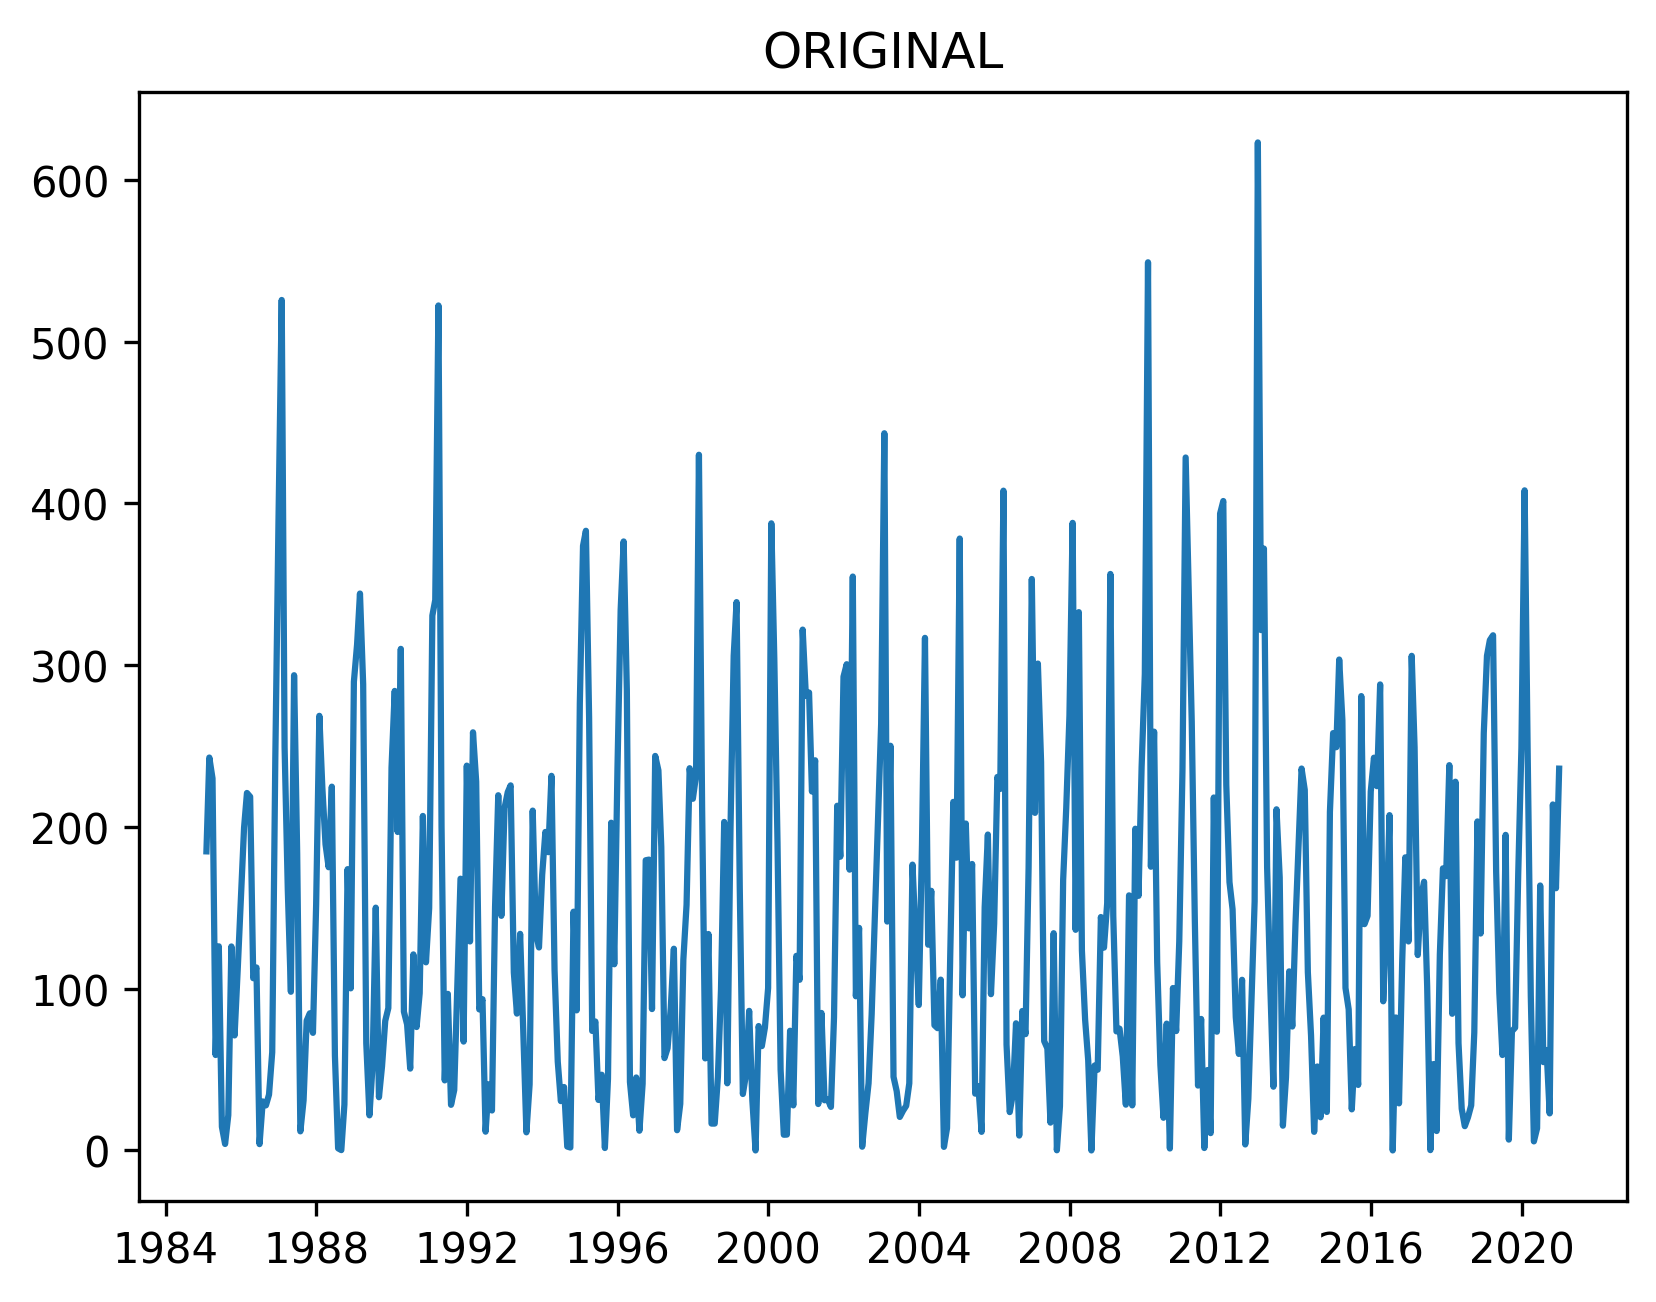

In [8]:
plt.figure(dpi=300)
plt.plot(ser)
plt.title("ORIGINAL")
plt.show()

2. Faça a decomposição da série em 3 parte: 'Tendência', 'Sazonalidade' e 'Resíduo'. Para cada componente, faça os seguintes itens:

a. Apresente, graficamente, o comportamento da 'Tendência', 'Sazonalidade' e 'Resíduo' como função do tempo. 

<Figure size 1920x1440 with 0 Axes>

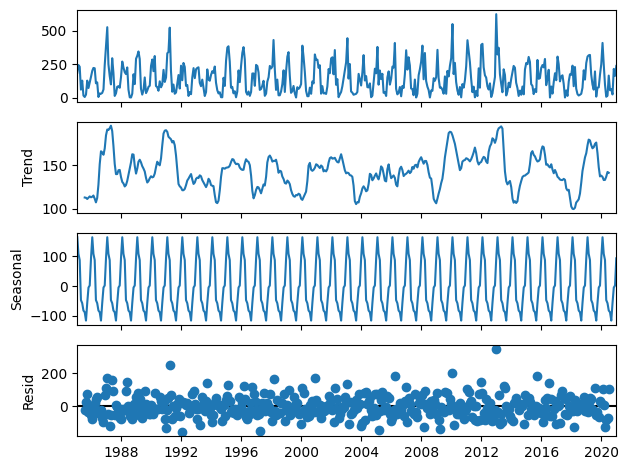

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomposicao=seasonal_decompose(ser,period=12)

plt.figure(dpi=300)
decomposicao.plot()
plt.show()



b. Teste a estacionaridade para cada componente.

In [10]:
import statsmodels.tsa.stattools

def testeestacionario(x):
    kpssx=statsmodels.tsa.stattools.kpss(x)
    valorcritico=kpssx[3]['5%']
    teste=kpssx[0]
    if teste>valorcritico:
        texto='A série NÃO estacionária'
    else:
        texto='A série É estacionária'
    return texto

In [26]:
testenormal(ser)
testeestacionario(ser)

/var/folders/hh/sy5ws2px2632l4y5ft5fb97r0000gp/T/ipykernel_12000/3016671585.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpssx=statsmodels.tsa.stattools.kpss(x)


'A série É estacionária'

c. Teste a normalidade para cada componente.

In [12]:

import scipy.stats as stats

def testenormal(x):
    e,p=stats.shapiro(x)
    texto='A série NÃO é normal'
    if p>=0.05:
        texto='A série É normal' 
    return texto

In [13]:
testenormal(ser)

'A série NÃO é normal'

3. Faça a transformação cúbica e logaritmica em df. Para cada transformação, faça uma diferenciação. Em quais operações é possível obter uma evolução estacionária e/ou normal?

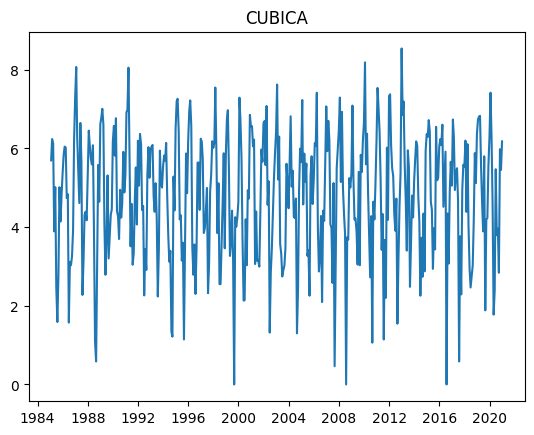

A série NÃO é normal
A série É estacionária


/var/folders/hh/sy5ws2px2632l4y5ft5fb97r0000gp/T/ipykernel_12000/3016671585.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpssx=statsmodels.tsa.stattools.kpss(x)


In [31]:
ser3=ser**(1/3)

plt.plot(ser3)
plt.title("CUBICA")
plt.show()

print(testenormal(ser3))
print(testeestacionario(ser3))

/Users/clairtonluz/projects/personal/MBA-em-ciencia-de-dados/Previsão de Series Temporais/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


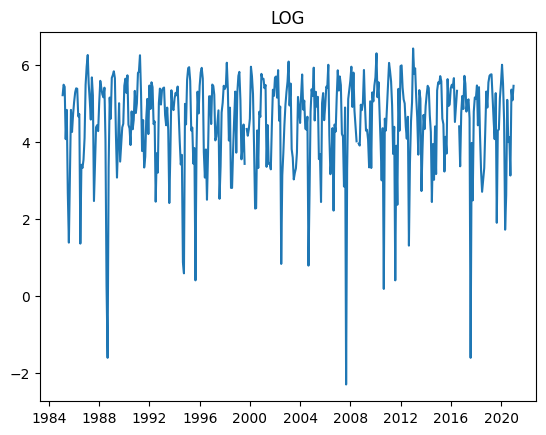

A série É normal
A série É estacionária


/var/folders/hh/sy5ws2px2632l4y5ft5fb97r0000gp/T/ipykernel_12000/3016671585.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpssx=statsmodels.tsa.stattools.kpss(x)


In [33]:
ser2=np.log(ser)

plt.plot(ser2)
plt.title("LOG")
plt.show()

print(testenormal(ser2))
print(testeestacionario(ser2.replace([np.inf, -np.inf], np.nan).dropna()))

In [16]:
ser_diff=ser-ser.shift(1).dropna()
ser_diff2=ser2-ser2.shift(1).dropna()
ser_diff3=ser3-ser3.shift(1).dropna()

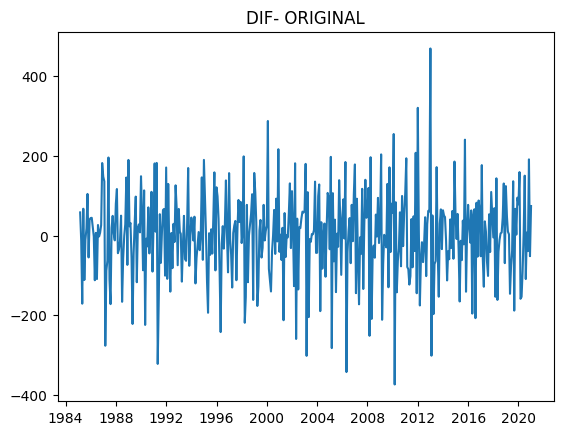

In [17]:
plt.plot(ser_diff)
plt.title("DIF- ORIGINAL")
plt.show()

In [18]:
print(testenormal(ser_diff))
print(testeestacionario(ser_diff.dropna()))

A série NÃO é normal
A série É estacionária


/var/folders/hh/sy5ws2px2632l4y5ft5fb97r0000gp/T/ipykernel_12000/3016671585.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpssx=statsmodels.tsa.stattools.kpss(x)


(array([ 2.,  3.,  4.,  8., 13., 24., 33., 60., 67., 83., 55., 34., 20.,
        19.,  3.,  1.,  1.,  0.,  0.,  1.]),
 array([-373.7  , -331.555, -289.41 , -247.265, -205.12 , -162.975,
        -120.83 ,  -78.685,  -36.54 ,    5.605,   47.75 ,   89.895,
         132.04 ,  174.185,  216.33 ,  258.475,  300.62 ,  342.765,
         384.91 ,  427.055,  469.2  ]),
 <BarContainer object of 20 artists>)

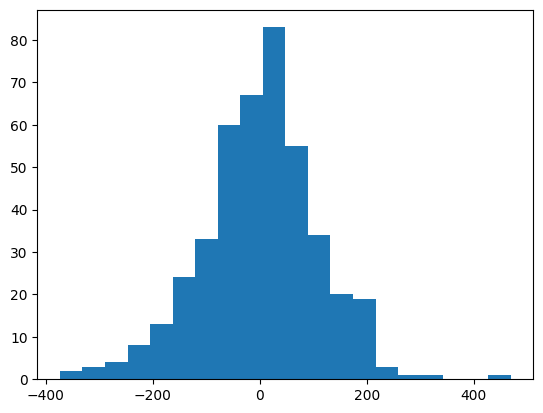

In [19]:
plt.hist(ser_diff.dropna(),bins=20)

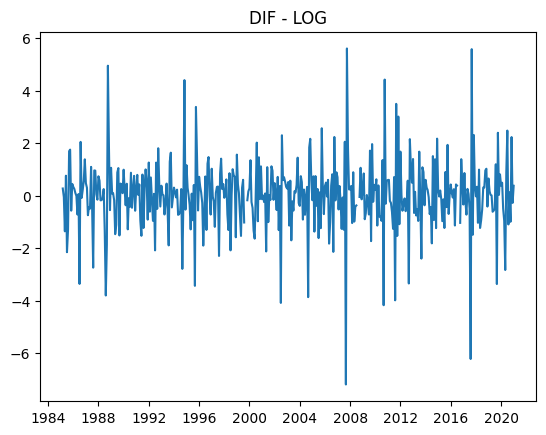

In [20]:
plt.plot(ser_diff2)
plt.title("DIF - LOG")
plt.show()

In [22]:
print(testenormal(ser_diff2.dropna()))
print(testeestacionario(ser_diff2.replace([np.inf, -np.inf], np.nan).dropna()))

A série NÃO é normal
A série É estacionária


/var/folders/hh/sy5ws2px2632l4y5ft5fb97r0000gp/T/ipykernel_12000/3016671585.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpssx=statsmodels.tsa.stattools.kpss(x)


(array([  1.,   1.,   0.,   0.,   2.,   6.,   4.,   7.,  16.,  47.,  87.,
        131.,  71.,  25.,  17.,   3.,   2.,   0.,   3.,   2.]),
 array([-7.2026612 , -6.56187173, -5.92108227, -5.2802928 , -4.63950334,
        -3.99871387, -3.35792441, -2.71713494, -2.07634548, -1.43555601,
        -0.79476655, -0.15397708,  0.48681239,  1.12760185,  1.76839132,
         2.40918078,  3.04997025,  3.69075971,  4.33154918,  4.97233864,
         5.61312811]),
 <BarContainer object of 20 artists>)

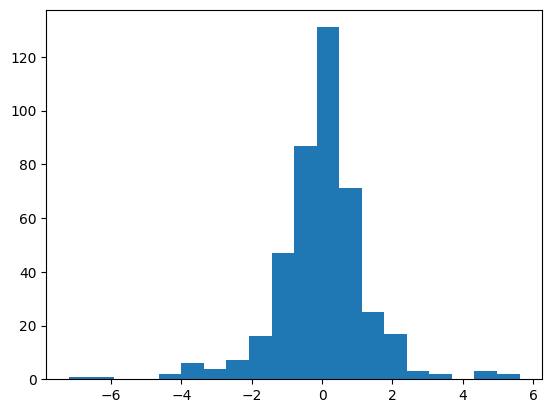

In [28]:
plt.hist(ser_diff2.replace([np.inf, -np.inf], np.nan).dropna(),bins=20)

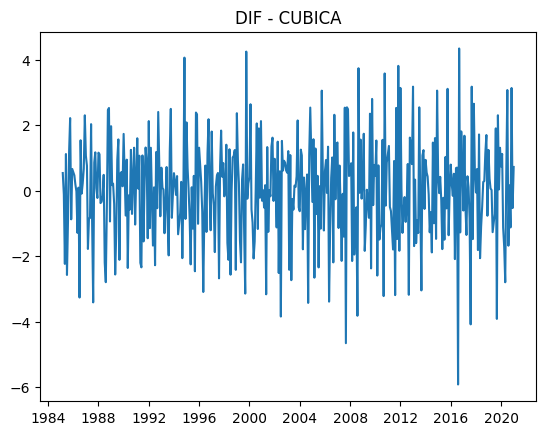

In [23]:
plt.plot(ser_diff3)
plt.title("DIF - CUBICA")
plt.show()

In [25]:
print(testenormal(ser_diff3.dropna()))
print(testeestacionario(ser_diff3.replace([np.inf, -np.inf], np.nan).dropna()))

A série É normal
A série É estacionária


/var/folders/hh/sy5ws2px2632l4y5ft5fb97r0000gp/T/ipykernel_12000/3016671585.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpssx=statsmodels.tsa.stattools.kpss(x)


(array([ 1.,  0.,  1.,  2.,  5.,  8., 17., 21., 24., 48., 44., 64., 60.,
        54., 33., 15., 20.,  8.,  3.,  3.]),
 array([-5.91833804, -5.4050206 , -4.89170317, -4.37838573, -3.86506829,
        -3.35175085, -2.83843341, -2.32511598, -1.81179854, -1.2984811 ,
        -0.78516366, -0.27184622,  0.24147121,  0.75478865,  1.26810609,
         1.78142353,  2.29474097,  2.8080584 ,  3.32137584,  3.83469328,
         4.34801072]),
 <BarContainer object of 20 artists>)

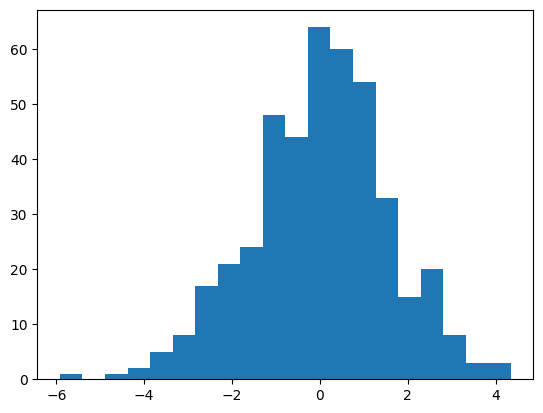

In [30]:
plt.hist(ser_diff3.dropna(),bins=20)